# Case Study 
## The annual Percentage Rate of Interest Charged on New-Car Loans at Nine of the 					Largest Banks in Six American Cities is provided and It is believed that the mean interest rate is same across the six american cities.  Conduct the hypothesis test and provide your inference


Use level of significance $\alpha$ = 0.05

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [4]:
df = pd.read_csv('car_insurance_rate.csv',sep='\t')
df.head()

,Atlanta,Chicago,Houston,Memphis,New York,Philadelphia
0,13.75,14.25,14.00,15.00,14.50,13.50
1,13.75,13.00,14.00,14.00,14.00,12.25
2,13.50,12.75,13.51,13.75,14.00,12.25
3,13.50,12.50,13.50,13.59,13.90,12.00
4,13.00,12.50,13.50,13.25,13.75,12.00


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Atlanta,9.0,13.194444,0.446825,12.50,13.0,13.00,13.50,13.75
Chicago,9.0,12.611111,0.710096,11.90,12.3,12.50,12.75,14.25
Houston,9.0,13.306667,0.556350,12.50,13.0,13.50,13.51,14.00
Memphis,9.0,13.244444,0.967007,11.89,12.5,13.25,13.75,15.00
New York,9.0,13.483333,0.718940,12.45,13.0,13.75,14.00,14.50
Philadelphia,9.0,12.200000,0.504356,11.90,12.0,12.00,12.25,13.50


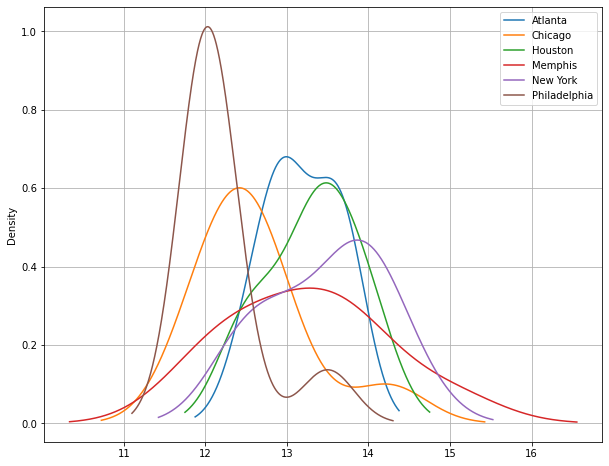

In [7]:
plt.figure(figsize=(10,8))
for i in df.columns:
    df[i].plot(kind='kde')
    plt.legend()
    plt.grid()
plt.show()

In [8]:
df_melt = df.melt(var_name='City') # using melt will reshape the dataframe and make it suitable for ols model
df_melt.head()

,City,value
0,Atlanta,13.75
1,Atlanta,13.75
2,Atlanta,13.50
3,Atlanta,13.50
4,Atlanta,13.00


In [9]:
df_melt.City.value_counts()

Atlanta         9
Houston         9
Memphis         9
New York        9
Philadelphia    9
Chicago         9
Name: City, dtype: int64

## Check Assumptions

In [10]:
import scipy.stats as stats

### Normality test (Shapiro-test)

The Shapiro-Wilk test is a way to tell if a random sample comes from a normal distribution.

H0: values is normally distributed

H1: values is not normally distributed

In [12]:
print(stats.shapiro(df_melt.value))

ShapiroResult(statistic=0.9501765370368958, pvalue=0.025322573259472847)


Since pValue > 0.05 we failed to reject the H0, hence values are normally distributed

### Equal Varience Test (Levene-test)

H0: All city have equal variences

H1: All city don't have equal variences

In [16]:
#Groups
df_melt.City.value_counts()
df_Atlanta = df_melt.value[df_melt['City'] == 'Atlanta']
df_Houston = df_melt.value[df_melt['City'] == 'Houston']
df_Memphis = df_melt.value[df_melt['City'] == 'Memphis']
df_NewYork = df_melt.value[df_melt['City'] == 'New York']
df_Philadelphia = df_melt.value[df_melt['City'] == 'Philadelphia']
df_Chicago = df_melt.value[df_melt['City'] == 'Chicago']

In [17]:
print(stats.levene(df_Atlanta,df_Houston,df_Memphis,df_NewYork,df_Philadelphia,df_Chicago))

LeveneResult(statistic=1.2797305056846457, pvalue=0.28815100971489654)


At 95% confidence level pvalue > 0.05, hence failed to reject H0, All city have equal varience 

# 1. Postulate the Null and Alternate Hypothesis

In [18]:
# H0: All City have equal mean
# H1: Atlest once City have different mean

# 2. Perform the analysis of variances test on the dataset

In [19]:
formula = 'value~C(City)'
model = ols(formula,df_melt).fit()
anv_table = anova_lm(model)
print(anv_table)

            df     sum_sq   mean_sq         F    PR(>F)
C(City)    5.0  10.945667  2.189133  4.829385  0.001175
Residual  48.0  21.758133  0.453294       NaN       NaN


## Conclusion

At 95% confidence level, We see that the p-value is less than alpha (0.05). Thus, we  𝐑𝐞𝐣𝐞𝐜𝐭  the  𝐍𝐮𝐥𝐥 𝐇𝐲𝐩𝐨𝐭𝐡𝐞𝐬𝐢𝐬  ( 𝐻0 ). This means at least one particular category in the 'City' variable has different mean of rate as compared to the other categories.

# END